In [4]:
import sympy as sp
from mira.sources.sympy_ode import template_model_from_sympy_odes
from mira.modeling.amr.petrinet import template_model_to_petrinet_json_file

# Define time variable
t = sp.symbols("t")

# Define time-dependent variables
S_l, S_h, E_h, P, I1, I2, H, R_h, S_r, E_r, I_r, R_r = sp.symbols(
    "S_l S_h E_h P I1 I2 H R_h S_r E_r I_r R_r", cls=sp.Function
)

# Define the parameters with spelled-out names
pi_h, rho, nu, lambda_h, mu_h, sigma_h, omega, theta, k1, k2, tau1, tau2, tau3, delta_h, pi_r, lambda_r, mu_r, sigma_r, delta_r, tau_r = sp.symbols(
    "pi_h rho nu lambda_h mu_h sigma_h omega theta k1 k2 tau1 tau2 tau3 delta_h pi_r lambda_r mu_r sigma_r delta_r tau_r"
)

# Define the system of ODEs
odes4 = [
    sp.Eq(S_l(t).diff(t), pi_h * (1 - rho) - nu * lambda_h * S_l(t) - mu_h * S_l(t)),
    sp.Eq(S_h(t).diff(t), pi_h * rho - lambda_h * S_h(t) - mu_h * S_h(t)),
    sp.Eq(E_h(t).diff(t), (nu * S_l(t) + S_h(t)) * lambda_h - (sigma_h + mu_h) * E_h(t)),
    sp.Eq(P(t).diff(t), sigma_h * E_h(t) - (omega + mu_h) * P(t)),
    sp.Eq(I1(t).diff(t), omega * P(t) - (theta + k1 + tau1 + mu_h) * I1(t)),
    sp.Eq(I2(t).diff(t), theta * I1(t) - (k2 + delta_h + tau2 + mu_h) * I2(t)),
    sp.Eq(H(t).diff(t), k1 * I1(t) + k2 * I2(t) - (delta_h + tau3 + mu_h) * H(t)),
    sp.Eq(R_h(t).diff(t), tau1 * I1(t) + tau2 * I2(t) + tau3 * H(t) - mu_h * R_h(t)),
    sp.Eq(S_r(t).diff(t), pi_r - lambda_r * S_r(t) - mu_r * S_r(t)),
    sp.Eq(E_r(t).diff(t), lambda_r * S_r(t) - (sigma_r + mu_r) * E_r(t)),
    sp.Eq(I_r(t).diff(t), sigma_r * E_r(t) - (delta_r + tau_r + mu_r) * I_r(t)),
    sp.Eq(R_r(t).diff(t), tau_r * I_r(t) - mu_r * R_r(t)),
]

concept_data = {
    'S_l': {'identifiers': {'ido': '0000514'},
            'context': {'severity': 'low', 'species': 'ncbitaxon:9606'}},
    'S_h': {'identifiers': {'ido': '0000514'},
            'context': {'severity': 'high', 'species': 'ncbitaxon:9606'}},
    'E_h': {'identifiers': {'apollosv': '00000154'},
            'context': {'species': 'ncbitaxon:9606'}},
    'P': {'identifiers': {'ido': '0000511'},
          'context': {'stage': 'predromal', 'species': 'ncbitaxon:9606'}},
    'I1': {'identifiers': {'ido': '0000511'},
           'context': {'stage': 'mild', 'species': 'ncbitaxon:9606'}},
    'I2': {'identifiers': {'ido': '0000511'},
           'context': {'stage': 'severe', 'species': 'ncbitaxon:9606'}},
    'H': {'identifiers': {'ido': '0000511'},
         'context': {'hospitalization': 'ncit:C25179', 'species': 'ncbitaxon:9606'}},
    'R_h': {'identifiers': {'ido': '0000592'},
         'context': {'species': 'ncbitaxon:9606'}},
    'S_r': {'identifiers': {'ido': '0000514'},
            'context': {'species': 'ncbitaxon:9989'}},
    'E_r': {'identifiers': {'apollosv': '00000154'},
            'context': {'species': 'ncbitaxon:9989'}},
    'I_r': {'identifiers': {'ido': '0000511'},
           'context': {'species': 'ncbitaxon:9989'}},
    'R_r': {'identifiers': {'ido': '0000592'},
            'context': {'species': 'ncbitaxon:9989'}},
}

parameter_data = {
    'Nh': {'value': 1.8e8},
    'Nr': {'value': 0.01},
    'mu_h': {'value': 0.000045},
    'mu_r': {'value': 0.002},
    'pi_h': {'value': 2500},
    'pi_r': {'value': 0.5},
    'rho': {'value': 0.8},
    'nu': {'value': 0.045},
    'beta_hh': {'value': 0.03},
    'beta_hr': {'value': 0.3045},
    'beta_rr': {'value': 0.025},
    'alpha': {'value': 0.75},
    'eta': {'value': 0.8},
    'sigma_h': {'value': 0.033},
    'sigma_r': {'value': 0.0083},
    'omega': {'value': 0.0042},
    'theta': {'value': 0.021},
    'k1': {'value': 0.2},
    'k2': {'value': 0.4},
    'tau1': {'value': 0.048},
    'tau2': {'value': 0.05},
    'tau3': {'value': 0.056},
    'tau_r': {'value': 0.083},
    'delta_i': {'value': 0.0011},
    'delta_h': {'value': 0.001},
    'delta_r': {'value': 0.057},
}

In [5]:
tm = template_model_from_sympy_odes(odes4, param_data=parameter_data, concept_data=concept_data)

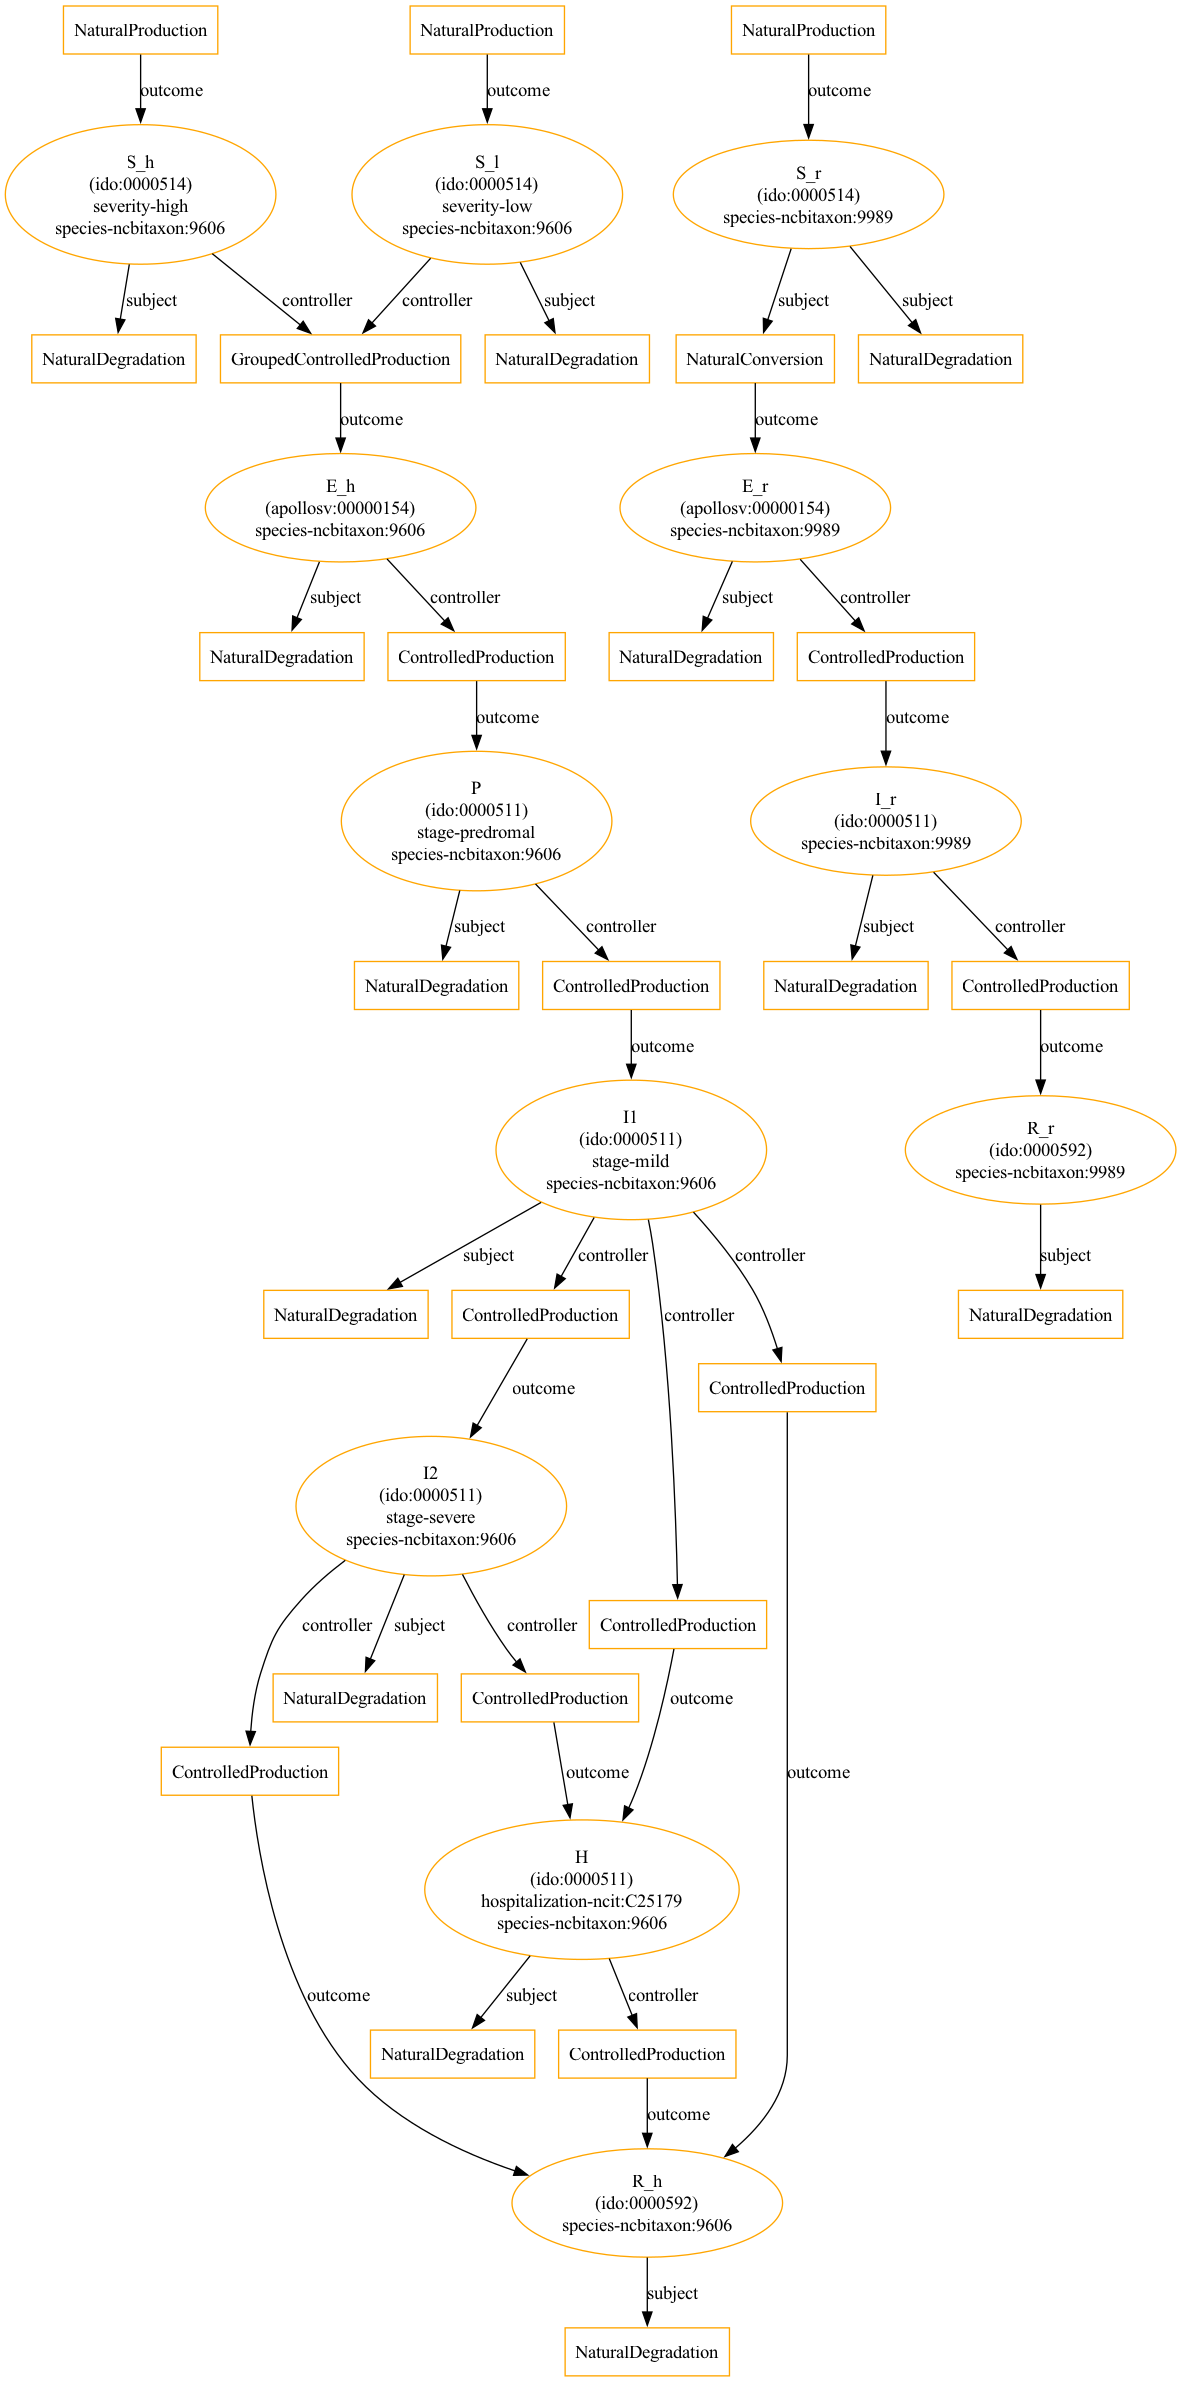

In [6]:
tm.draw_jupyter()

In [7]:
template_model_to_petrinet_json_file(tm, 'ModelA_base_petri.json')